# Analisando as notas em geral

In [2]:
import pandas as pd
notas = pd.read_csv("introducao-a-data-science-aula0/aula0/ml-latest-small/ratings.csv")

In [3]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [5]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [6]:
print("Média = ", notas.nota.mean())
print("Mediana = ", notas.nota.median())

Média =  3.501556983616962
Mediana =  3.5


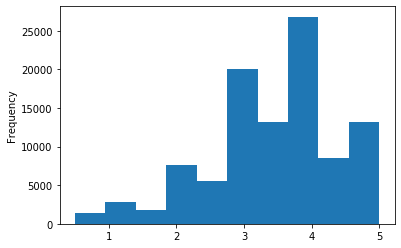

In [7]:
notas.nota.plot(kind='hist')

In [8]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [9]:
import seaborn as sns

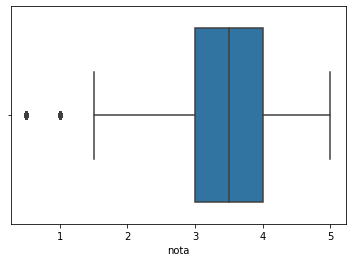

In [10]:
sns.boxplot(notas.nota)

# Olhando os filmes

In [11]:
filmes = pd.read_csv("introducao-a-data-science-aula0/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmesId", "titulo", "generos"]
filmes.head()

,filmesId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analizando algumas notas específicas por filme

In [12]:
print("Média das notas do filme Toy Story =", notas.query('filmeId == 1').nota.mean())

Média das notas do filme Toy Story = 3.9209302325581397


In [13]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

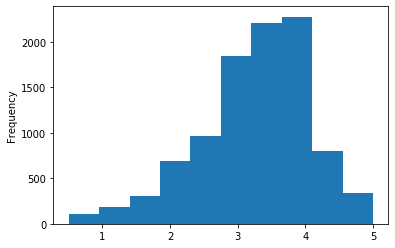

In [14]:
medias_por_filme.plot(kind='hist')

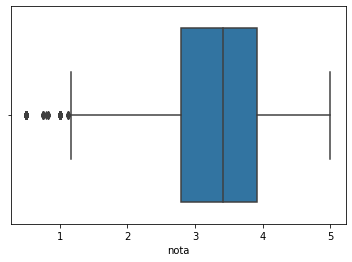

In [15]:
sns.boxplot(medias_por_filme)

In [16]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

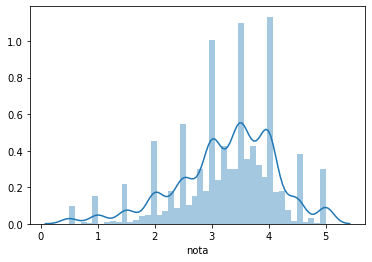

In [17]:
sns.distplot(medias_por_filme)

# Aula 3

In [18]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")

In [19]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [20]:
tmdb.original_language.unique() #categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
#primeiro grau
#segundo grau
#terceiro grau
#1º grau < 2º grau < 3º #categorica ordinal

In [21]:
tmdb.budget.unique() #quantitativa contínua

array([237000000, 300000000, 245000000, 250000000, 260000000, 258000000,
       280000000, 270000000, 200000000, 255000000, 225000000, 220000000,
       380000000, 215000000, 180000000, 207000000, 209000000, 150000000,
       210000000, 170000000, 190000000, 195000000, 105000000, 185000000,
       175000000, 140000000, 176000003, 178000000, 145000000,  27000000,
       165000000, 160000000,  15000000,  38000000, 155000000, 149000000,
       144000000,  70000000, 100000000, 139000000, 135000000, 130000000,
       137000000, 120000000, 132000000, 110000000, 125000000, 127500000,
       127000000, 103000000,  65000000, 123000000, 115000000, 117000000,
       113000000,  97250400, 116000000, 112000000,  93000000, 107000000,
               0, 133000000, 108000000, 126000000,  90000000, 102000000,
        80000000,  84000000,  99000000,  10000000,  98000000,  94000000,
        85000000,  92000000,  95000000,  79000000,  75000000,  88000000,
        68000000,  20000000,  87000000,  60000000, 

In [ ]:
# quantidade de votos => 1, 2, 3, 4, 5 => não tem 2,5 votos => não é contínua

In [27]:
contagem_de_linguas = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ['original_language', 'total']
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


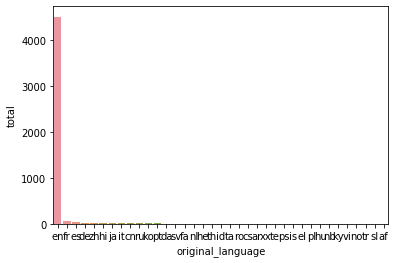

In [28]:
sns.barplot(x = "original_language", y = "total", data = contagem_de_linguas)


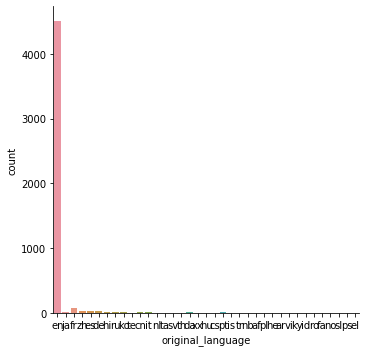

In [29]:
sns.catplot(x = "original_language", kind='count', data = tmdb)